# Market Segmentation of Electronic Vehicles in India

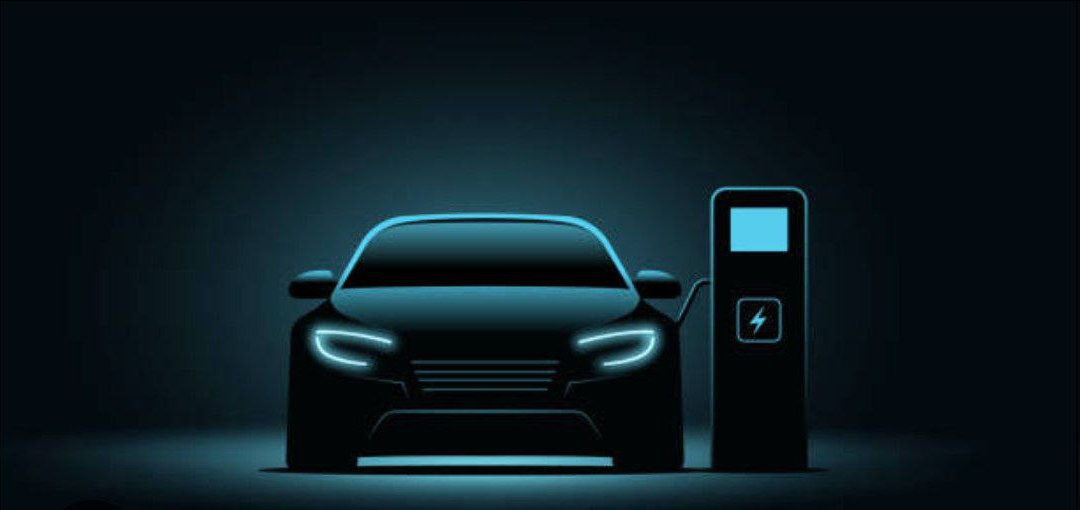

Dataset Details:
**EV_cars_India**


Dataset Details:

   1] Brands and models of EVs in India with their attributes

  2] State wise distribution of 2,3,4 wheeler EV s and passenger cars in India

  3] Electric Vehicle Charging Stations In INDIA Analysis


    

# **Imports**

In [ ]:

# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# Fetching Datasets

In [ ]:
# fetching dataset - 1
df1=pd.read_csv('/content/EV_cars_India_2023 (3).csv')
df1

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,NaN,NaN
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,NaN
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters),Automatic,NaN
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,NaN,NaN
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,440L L (Liters),Automatic,NaN
5,Hyundai Kona Electric,23.84 - 24.03 lakh,39.2kWh,452 km/full charge,134.1 Bhp,6.16 Hours,Automatic,NaN,NaN
6,Mahindra XUV400 EV,15.99 - 18.99 lakh,34.5 kWh,375 s km/full charge,50min,Automatic,NaN,NaN,NaN
7,Tata Nexon EV Max,16.49 - 19.54 lakh,40.5 kWh,453 km/full charge,141.04 Bhp,15 Hours,350 L (Liters),Automatic,NaN
8,Mercedes-Benz EQS,1.59 - 2.4 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,NaN,NaN
9,Audi e-tron GT,1.7 cr,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,NaN


In [ ]:
df1.shape

(30, 9)

In [ ]:
df1.columns

Index(['Car_name', 'Car_price', 'Batter_cap', 'Drive_range', 'Power',
       'Charge_time', 'transmission', 'Boot_space', 'Top_speed'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car_name      30 non-null     object
 1   Car_price     30 non-null     object
 2   Batter_cap    27 non-null     object
 3   Drive_range   30 non-null     object
 4   Power         30 non-null     object
 5   Charge_time   30 non-null     object
 6   transmission  28 non-null     object
 7   Boot_space    12 non-null     object
 8   Top_speed     6 non-null      object
dtypes: object(9)
memory usage: 2.2+ KB


# finding null values in the dataset

In [ ]:
# finding null values in the dataset
df1.isnull().sum()

Car_name         0
Car_price        0
Batter_cap       3
Drive_range      0
Power            0
Charge_time      0
transmission     2
Boot_space      18
Top_speed       24
dtype: int64

In [ ]:
df1.describe()

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
count,30,30,27,30,30,30,28,12,6
unique,30,29,16,18,18,14,12,2,4
top,MG Comet EV,1.9 cr,17.3 kWh,230 km/full charge,41.42 Bhp,Automatic,Automatic,Automatic,200kmph
freq,1,2,2,2,2,7,12,10,3


In [ ]:
def charge(dataframe):
    sbn.countplot(x=dataframe['Power'])
    plt.title('Count Plot of a Power')
    plt.xlabel('Power')
    plt.ylabel('Count')
charge

<function __main__.charge(dataframe)>

In [ ]:
df2 = pd.read_csv("/content/EV Stats-1 (1).csv")

In [ ]:
df2.shape

(30, 10)

In [ ]:
df2.columns

Index(['Sl. No', 'State',
       'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
       'Two Wheelers (Category L2 (CMVR))',
       'Two Wheelers (Max power not exceeding 250 Watts)',
       'Three Wheelers (Category L5 slow speed as per CMVR)',
       'Three Wheelers (Category L5 as per CMVR)',
       'Passenger Cars (Category M1 as per CMVR)', 'Buses', 'Total in state'],
      dtype='object')

In [ ]:
df2.describe()

,Sl. No,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,918.300000,468.966667,3751.266667,12.966667,24.000000,3519.033333,0.900000,8695.433333
std,8.803408,1482.441466,625.711098,4383.917198,30.737468,41.484521,4860.187299,3.835856,9911.814513
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,8.250000,19.000000,18.500000,65.000000,0.000000,0.000000,222.250000,0.000000,589.500000
50%,15.500000,447.500000,222.500000,2113.000000,0.000000,0.500000,985.500000,0.000000,4206.000000
75%,22.750000,762.500000,706.250000,5003.750000,6.000000,33.750000,5303.250000,0.000000,13951.500000
max,30.000000,7182.000000,2355.000000,15199.000000,117.000000,139.000000,19129.000000,21.000000,34013.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Sl. No                                                              30 non-null     int64 
 1   State                                                               30 non-null     object
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  30 non-null     int64 
 3   Two Wheelers (Category L2 (CMVR))                                   30 non-null     int64 
 4   Two Wheelers (Max power not exceeding 250 Watts)                    30 non-null     int64 
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 30 non-null     int64 
 6   Three Wheelers (Category L5 as per CMVR)                            30 non-null     int64 
 7   Passenger Cars (Category M1 

In [ ]:
# finding null values in the dataset
df2.isnull().sum()

Sl. No                                                                0
State                                                                 0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    0
Two Wheelers (Category L2 (CMVR))                                     0
Two Wheelers (Max power not exceeding 250 Watts)                      0
Three Wheelers (Category L5 slow speed as per CMVR)                   0
Three Wheelers (Category L5 as per CMVR)                              0
Passenger Cars (Category M1 as per CMVR)                              0
Buses                                                                 0
Total in state                                                        0
dtype: int64


## **Performing Exploratory Data Analysis(EDA)**
### Data Description and analysis for both datasets

In [ ]:
# getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2)


'<<< DATASET 1 >>>'

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
count,30,30,27,30,30,30,28,12,6
unique,30,29,16,18,18,14,12,2,4
top,MG Comet EV,1.9 cr,17.3 kWh,230 km/full charge,41.42 Bhp,Automatic,Automatic,Automatic,200kmph
freq,1,2,2,2,2,7,12,10,3


'<<< DATASET 2 >>>'

,Sl. No,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,918.300000,468.966667,3751.266667,12.966667,24.000000,3519.033333,0.900000,8695.433333
std,8.803408,1482.441466,625.711098,4383.917198,30.737468,41.484521,4860.187299,3.835856,9911.814513
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,8.250000,19.000000,18.500000,65.000000,0.000000,0.000000,222.250000,0.000000,589.500000
50%,15.500000,447.500000,222.500000,2113.000000,0.000000,0.500000,985.500000,0.000000,4206.000000
75%,22.750000,762.500000,706.250000,5003.750000,6.000000,33.750000,5303.250000,0.000000,13951.500000
max,30.000000,7182.000000,2355.000000,15199.000000,117.000000,139.000000,19129.000000,21.000000,34013.000000


In [ ]:
# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)

DF1 Shape:  (30, 9)
DF2 Shape:  (30, 10)


In [ ]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 >>> ')
print(df1.info())
print('\n <<< DATASET 2 >>>')
print(df2.info())

 <<< DATASET 1 >>> 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car_name      30 non-null     object
 1   Car_price     30 non-null     object
 2   Batter_cap    27 non-null     object
 3   Drive_range   30 non-null     object
 4   Power         30 non-null     object
 5   Charge_time   30 non-null     object
 6   transmission  28 non-null     object
 7   Boot_space    12 non-null     object
 8   Top_speed     6 non-null      object
dtypes: object(9)
memory usage: 2.2+ KB
None

 <<< DATASET 2 >>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Sl. No                                             


# **Analysis of 2 Wheeler EVs**
## UttarPradesh, Gujrat, Haryana are among the top states with the majority of EV 2W vehicles, while the remaining states have less number .

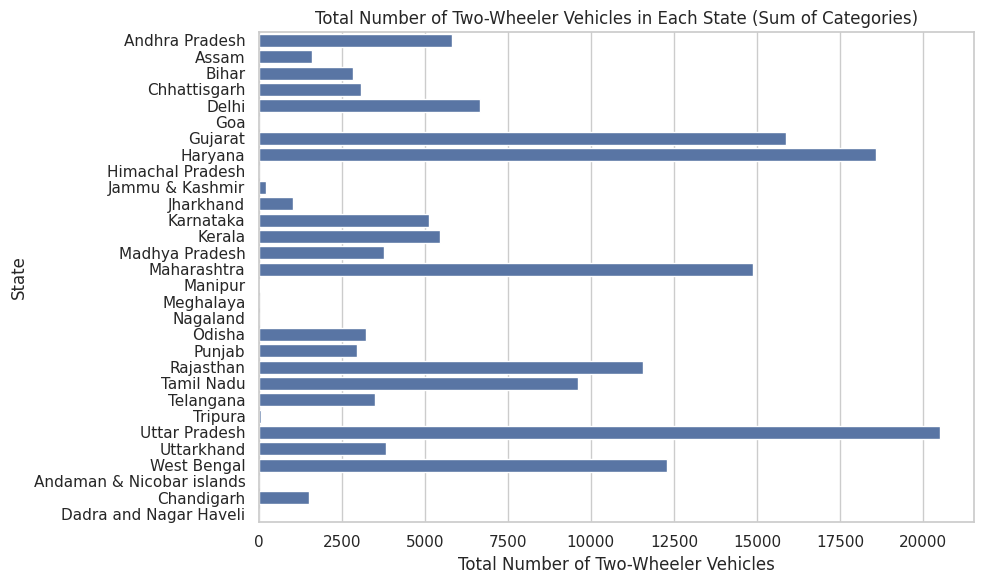

In [ ]:
# Sum the three columns to get the total number of two-wheeler vehicles

df2['Total Two Wheelers'] = df2[['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
                               'Two Wheelers (Category L2 (CMVR))',
                               'Two Wheelers (Max power not exceeding 250 Watts)']].sum(axis=1)

# Create a barplot using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Plot the total number of two-wheeler vehicles using sns.barplot
sns.barplot(x="Total Two Wheelers", y="State", data=df2, orient="h")

# Customize plot labels and appearance
plt.xlabel("Total Number of Two-Wheeler Vehicles")
plt.ylabel("State")
plt.title("Total Number of Two-Wheeler Vehicles in Each State (Sum of Categories)")

# Show the plot
plt.tight_layout()
plt.show()

# OBSERVATION

UttarPradesh, Gujrat, Haryana are among the top states with the majority of EV 2W vehicles, while the remaining states have less number .


# **Analysis of 3 wheeler EV s**
# UttarPradesh, Chattisgarh, Haryana are among the top states with the majority of EV 3W vehicles, while the remaining states have less **number**

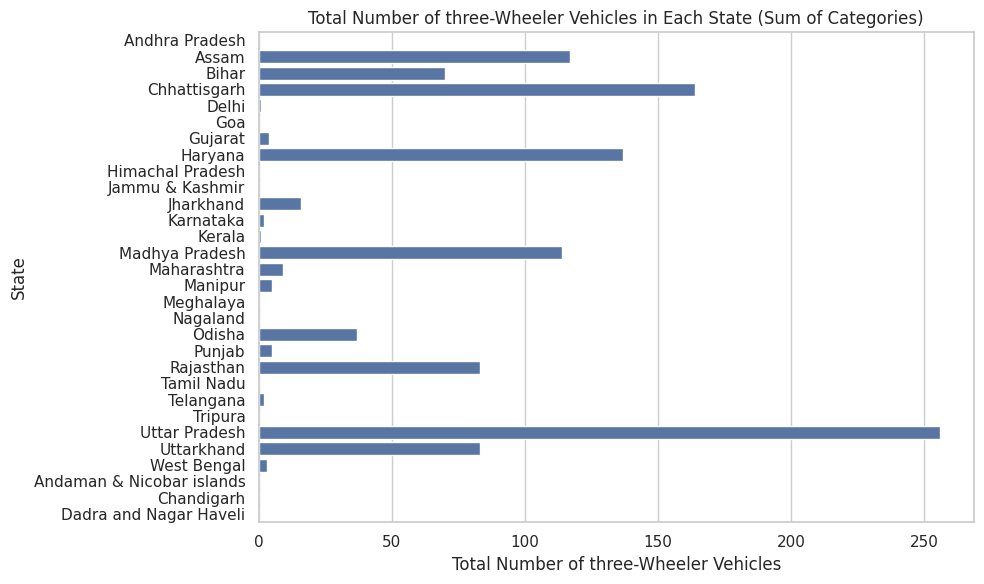

In [ ]:
# Sum the three columns to get the total number of two-wheeler vehicles
df2['Total Three Wheelers'] = df2[['Three Wheelers (Category L5 slow speed as per CMVR)',
                               'Three Wheelers (Category L5 as per CMVR)']].sum(axis=1)

# Create a barplot using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Plot the total number of two-wheeler vehicles using sns.barplot
sns.barplot(x="Total Three Wheelers", y="State", data=df2, orient="h")

# Customize plot labels and appearance
plt.xlabel("Total Number of three-Wheeler Vehicles")
plt.ylabel("State")
plt.title("Total Number of three-Wheeler Vehicles in Each State (Sum of Categories)")

# Show the plot
plt.tight_layout()
plt.show()


# OBSERVATION

UttarPradesh, Chattisgarh, Haryana are among the top states with the majority of EV 3W vehicles, while the remaining states have less number


# Analysis of Buses
Delhi, Goa, Maharashtra, Kerela and Karnataka are among the only states with EV buses in India .

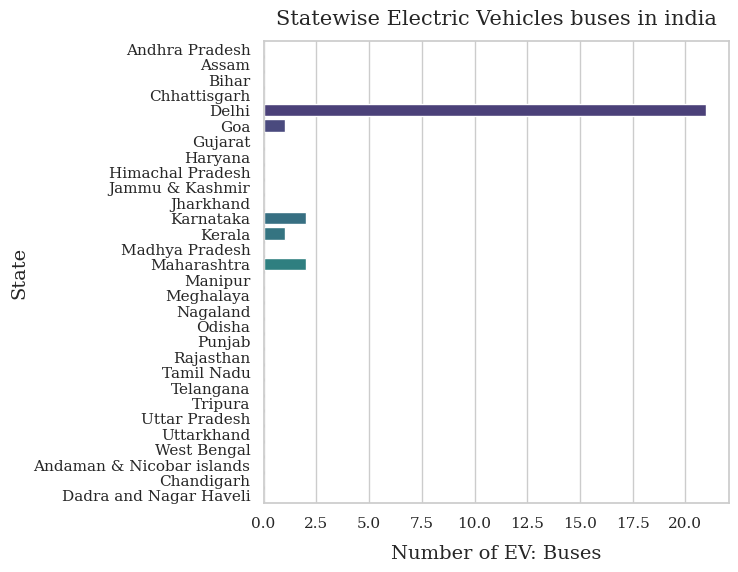

In [ ]:
# 4 wheelers data visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, y=df2['State'].sort_values(ascending=True), x='Buses', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: Buses', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles buses in india', weight=200, family='serif', size=15, pad=12)
plt.show()


## Analysis of Passenger Cars

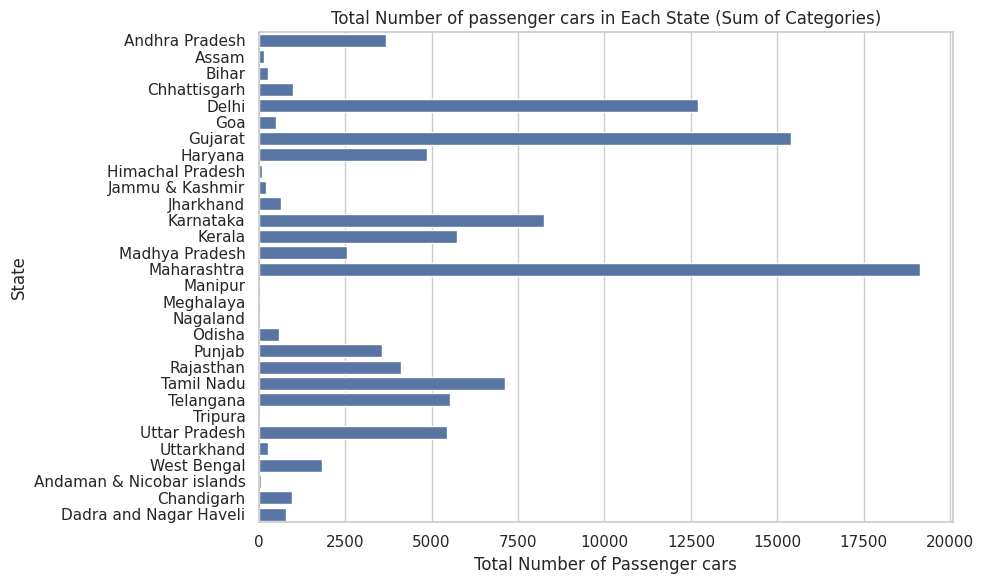

In [ ]:
# Sum the three columns to get the total number of two-wheeler vehicles
df2['Total Passenger cars'] = df2[['Passenger Cars (Category M1 as per CMVR)']].sum(axis=1)

# Create a barplot using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Plot the total number of two-wheeler vehicles using sns.barplot
sns.barplot(x="Total Passenger cars", y="State", data=df2, orient="h")

# Customize plot labels and appearance
plt.xlabel("Total Number of Passenger cars")
plt.ylabel("State")
plt.title("Total Number of passenger cars in Each State (Sum of Categories)")

# Show the plot
plt.tight_layout()
plt.show()

## Brand wise EV analysis

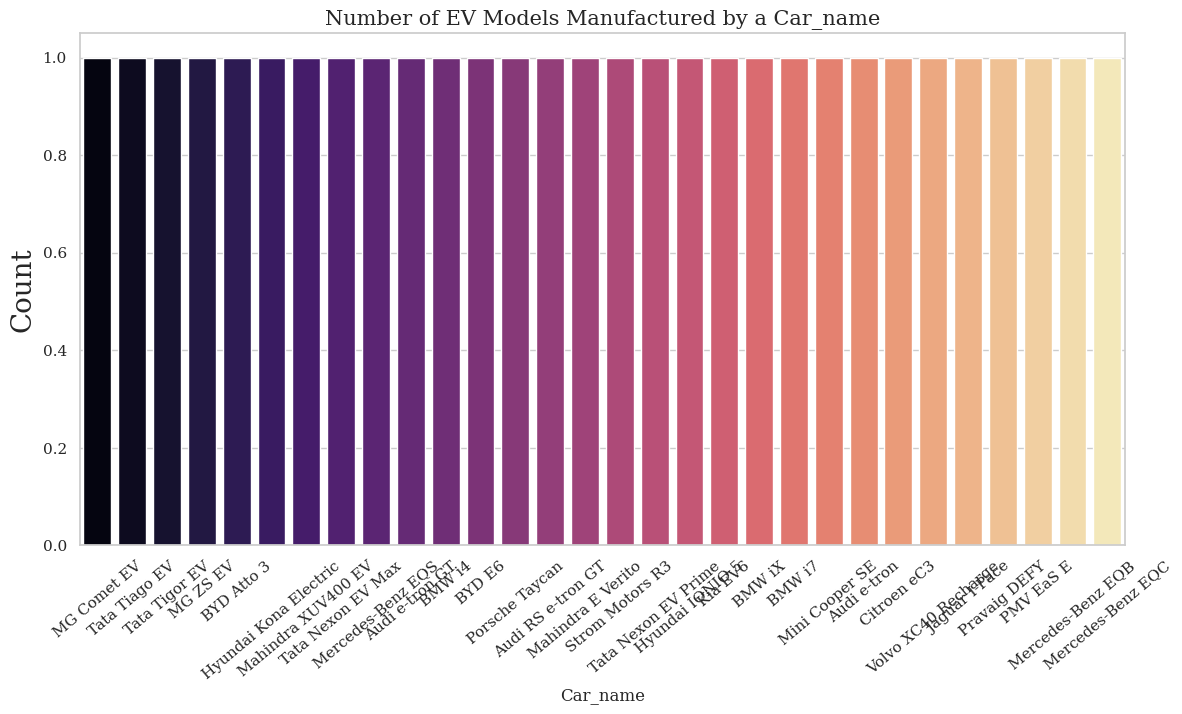

In [ ]:
# brand-wise count of EV models
sns.catplot(data=df1, x= 'Car_name', kind='count',palette='magma' , height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Car_name',family='serif', size=12)
plt.ylabel('Count', family='serif', size=20)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Car_name', family='serif', size=15)
plt.show()

# ANALYSIS OF DISTRIBUTION OF DIFFERNT CAR PRICE IN EV

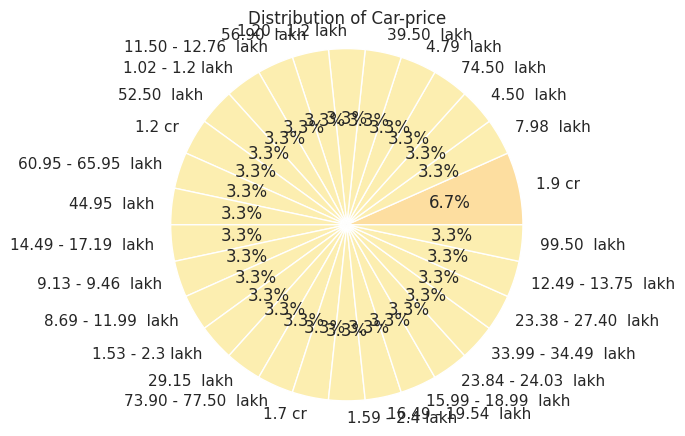

In [ ]:
from matplotlib import cm
dataset = df1['Car_price'].value_counts()


plt.show()
# Calculate the percentage of each price
total_count = len(df1)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.magma_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Car-price')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# EV available in india

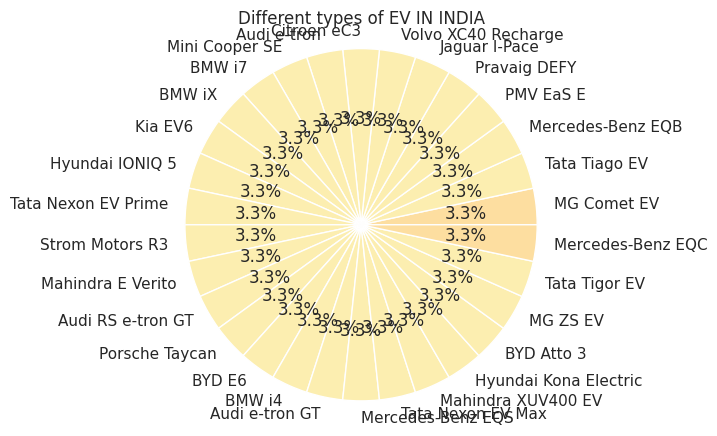

In [ ]:
from matplotlib import cm
dataset = df1['Car_name'].value_counts()


plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Different types of EV IN INDIA')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Electric Vehicles of Different Battery Capacity in India

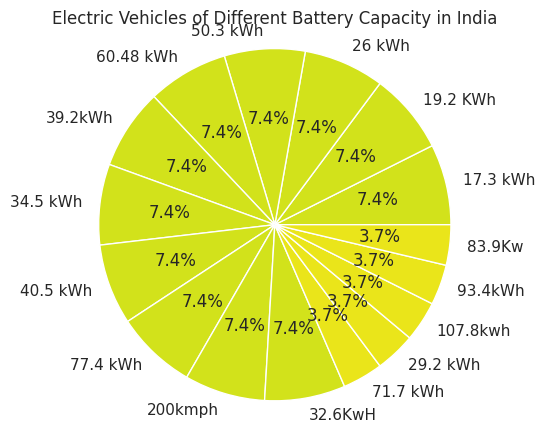

In [ ]:

dataset = df1['Batter_cap'].value_counts()

# Calculate the percentage of each body style
total_count = len(df1)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicles of Different Battery Capacity in India')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Power vs. Drive_range

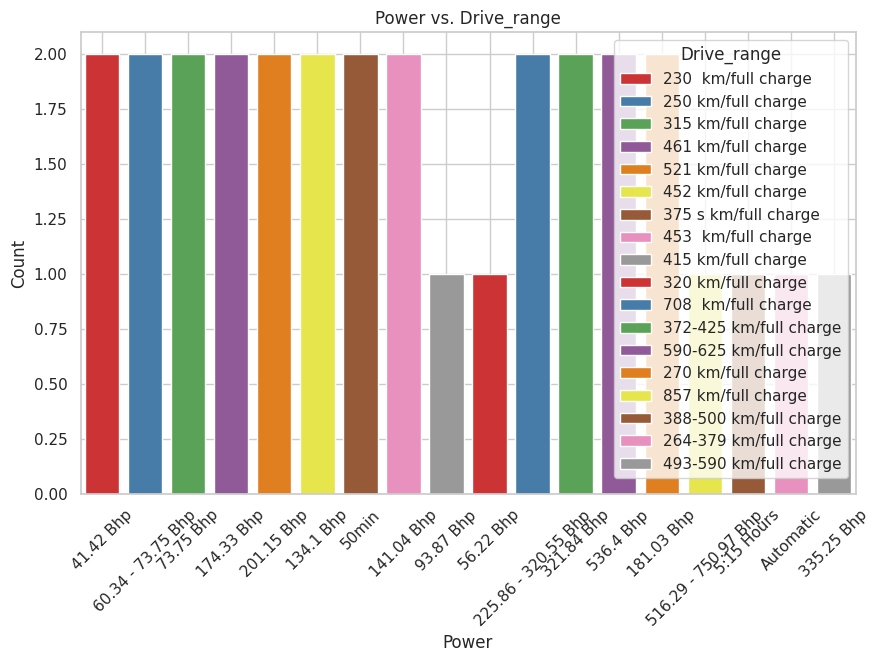

In [ ]:
# Categorical plot: Power vs. Drive_range
plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette("Set1")
sns.countplot(data=df1, x='Power', hue='Drive_range', palette=custom_palette)
plt.title('Power vs. Drive_range')
plt.xlabel('Power')
plt.ylabel('Count')
plt.legend(title='Drive_range', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Power vs. Drive_range

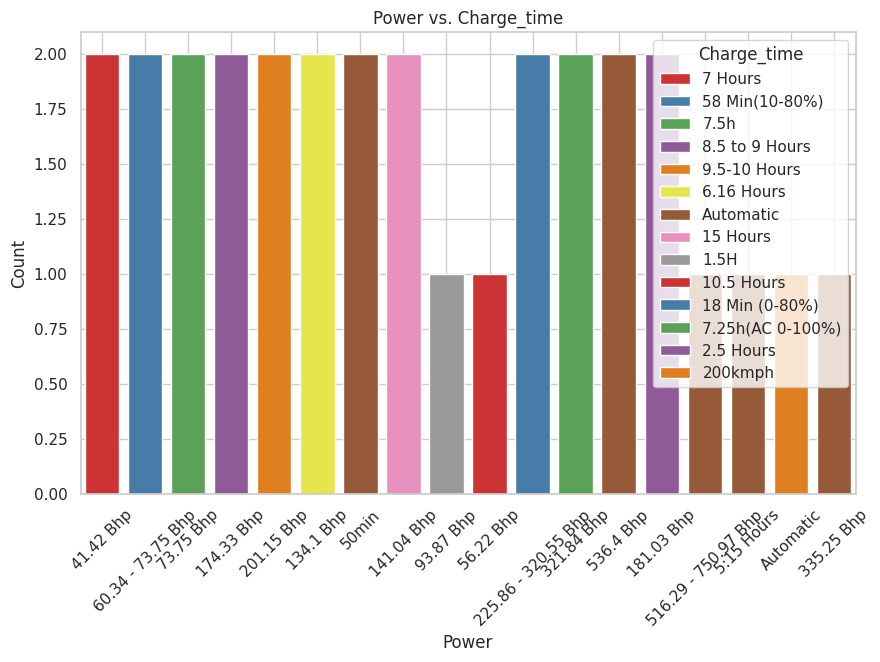

In [ ]:
# Categorical plot: Power vs. Charge_time
plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette("Set1")
sns.countplot(data=df1, x='Power', hue='Charge_time', palette=custom_palette)
plt.title('Power vs. Charge_time')
plt.xlabel('Power')
plt.ylabel('Count')
plt.legend(title='Charge_time', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Car_price Comparison

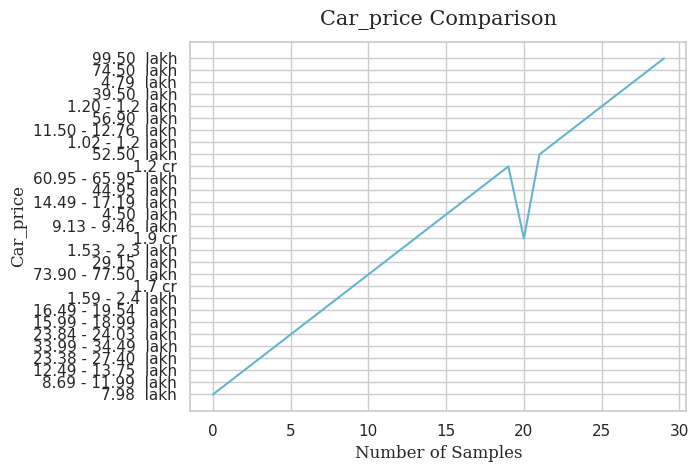

In [ ]:
# plotting the price from dataset 2
plt.plot(df1['Car_price'], color='c')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Car_price', family='serif', size=12)
plt.title('Car_price Comparison', family='serif', size=15, pad=12);

# Car_price Distribution

Text(0.5, 1.0, 'Car_price Distribution')

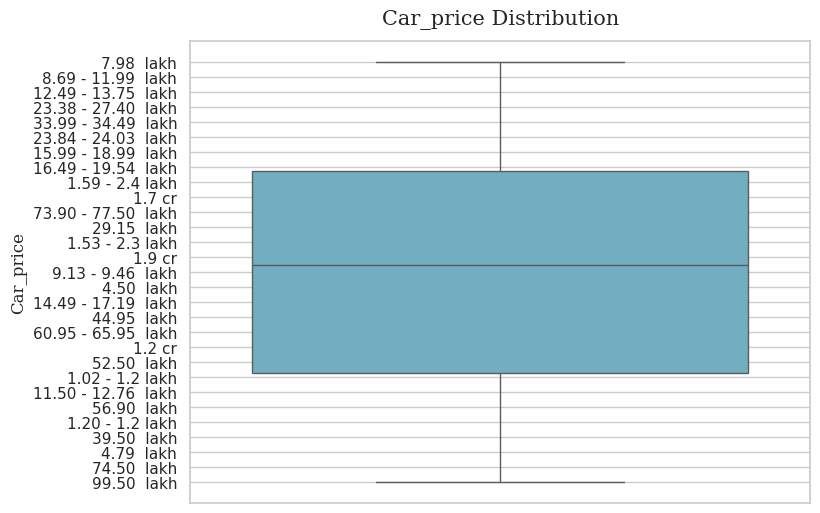

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, y='Car_price', color='c')
plt.ylabel('Car_price', family='serif', size=12)
plt.title ('Car_price Distribution', family='serif', size=15, pad=12)

# Importing another dataset for analysis of electric charging stations in (INDIA).

In [ ]:
df3 = pd.read_csv("/content/electric_vehicle_charging_station_list (2).csv")
df3.head()

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


In [ ]:
print('DF3 Shape: ', df3.shape)

DF3 Shape:  (202, 9)


In [ ]:
d3 = df3.describe()

In [ ]:
display('<<< DATASET 3 >>>', d3, '<<< DATASET 3 >>>')

'<<< DATASET 3 >>>'

,no,latitude,longitude
count,202.000000,202.000000,202.000000
mean,101.500000,25.960987,78.418002
std,58.456537,5.616108,3.097664
min,1.000000,8.481051,76.277781
25%,51.250000,28.535516,77.212996
50%,101.500000,28.580286,77.226252
75%,151.750000,28.617783,77.375216
max,202.000000,28.642892,88.509064


'<<< DATASET 3 >>>'

Scatter plot for Latitude and Longitude Charging Station in INDIA

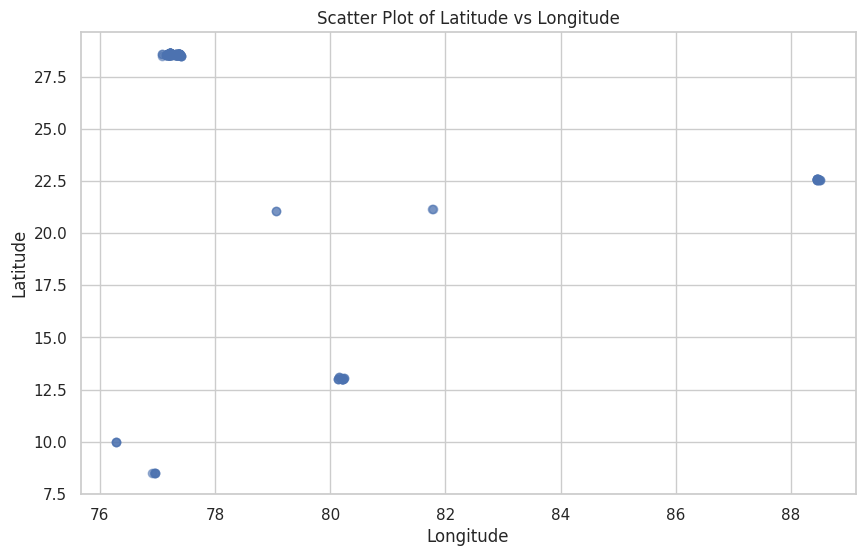

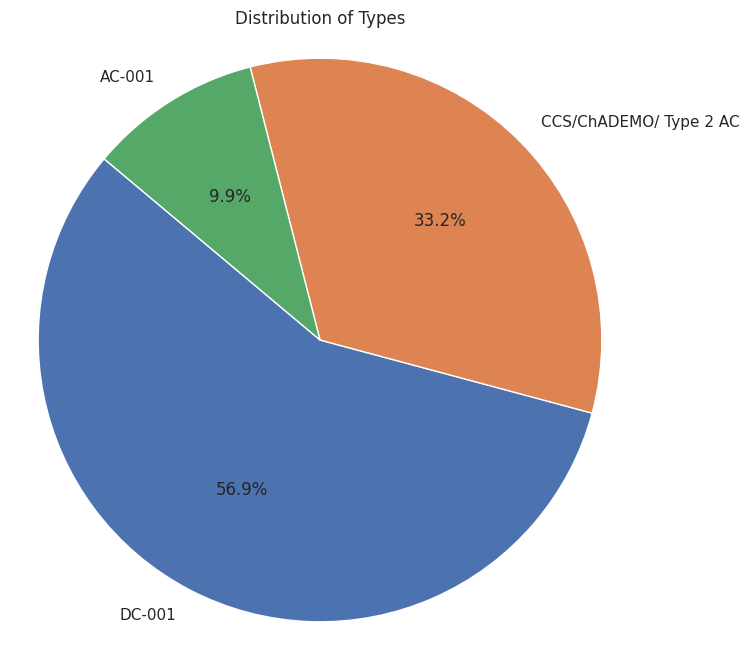

Basic Analysis:
Total number of data points: 202
Unique types: 3

Types Distribution:
type
DC-001                    115
CCS/ChADEMO/ Type 2 AC     67
AC-001                     20
Name: count, dtype: int64


In [ ]:
# Scatter plot for Latitude and Longitude
plt.figure(figsize=(10, 6))
plt.scatter(df3['longitude'], df3['latitude'], alpha=0.5)
plt.title('Scatter Plot of Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Pie chart for 'type' column
type_counts = df3['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Basic Analysis
print("Basic Analysis:")
print("Total number of data points:", len(df3))
print("Unique types:", df3['type'].nunique())
print("\nTypes Distribution:")
print(type_counts)

In [ ]:
# Group data by state
state_grouped = df2.groupby('State').sum()

# Add additional analysis
state_grouped['Total Vehicles'] = state_grouped.sum(axis=1)
state_grouped['Average Vehicles'] = state_grouped['Total in state'] / state_grouped['Total Vehicles']

# Display state-wise analysis
print("State-wise Analysis:")
print(state_grouped[['Total in state', 'Total Vehicles', 'Average Vehicles']])

State-wise Analysis:
                           Total in state  Total Vehicles  Average Vehicles
State                                                                      
Andaman & Nicobar islands              82             274          0.299270
Andhra Pradesh                       9492           28477          0.333322
Assam                                1875            5627          0.333215
Bihar                                3171            9516          0.333228
Chandigarh                           2500            7529          0.332049
Chhattisgarh                         4234           12706          0.333228
Dadra and Nagar Haveli                816            2478          0.329298
Delhi                               19381           58127          0.333425
Goa                                   514            1547          0.332256
Gujarat                             31267           93808          0.333308
Haryana                             23589           70775          

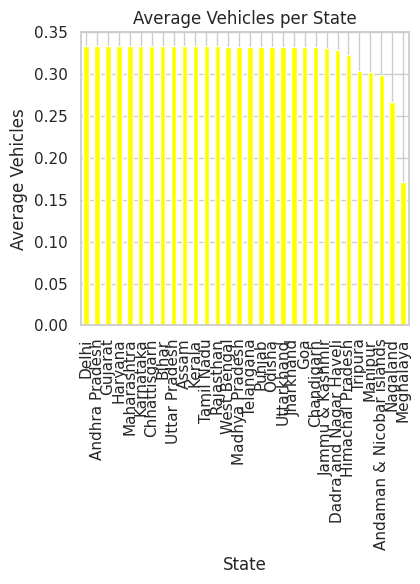

In [ ]:
state_grouped = df2.groupby('State').sum()

# Add additional analysis
state_grouped['Total Vehicles'] = state_grouped.sum(axis=1)
state_grouped['Average Vehicles'] = state_grouped['Total in state'] / state_grouped['Total Vehicles']

# Visual representation with diagrams and graphs
plt.figure(figsize=(12, 6))

# Bar plot for average vehicles per state
plt.subplot(1, 3, 3)
state_grouped['Average Vehicles'].sort_values(ascending=False).plot(kind='bar', color='Yellow')
plt.title('Average Vehicles per State')
plt.xlabel('State')
plt.ylabel('Average Vehicles')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Total Vehicles')

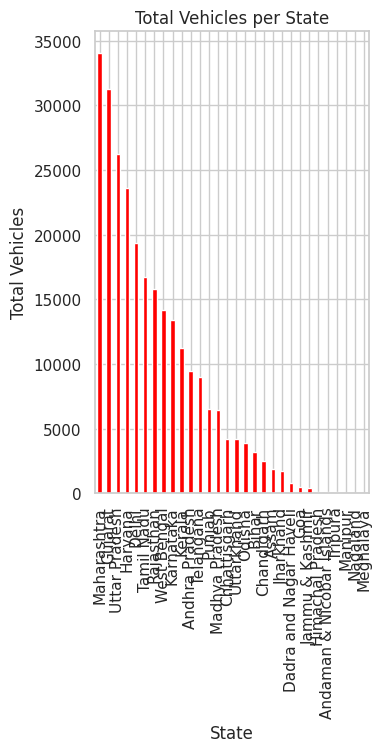

In [ ]:
state_grouped = df2.groupby('State').sum()

# Add additional analysis
state_grouped['Total Vehicles'] = state_grouped.sum(axis=1)
state_grouped['Average Vehicles'] = state_grouped['Total in state'] / state_grouped['Total Vehicles']

# Visual representation with diagrams and graphs
plt.figure(figsize=(12, 6))
# Bar plot for total vehicles per state
plt.subplot(1, 3, 1)
state_grouped['Total in state'].sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Total Vehicles per State')
plt.xlabel('State')
plt.ylabel('Total Vehicles')

# Charging Stations Sanctioned

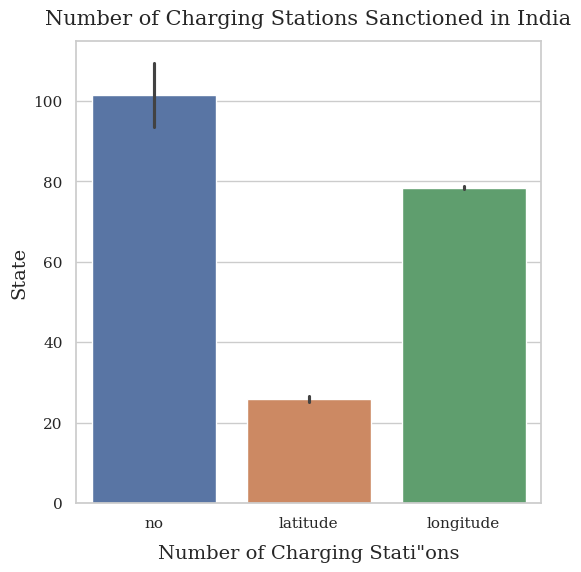

In [ ]:
# charging stations sanctioned visualization from dataset
plt.figure(figsize=(6, 6))
sns.barplot(data=df3)
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of Charging Stati"ons', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Number of Charging Stations Sanctioned in India', weight=200, family='serif', size=15, pad=12)
plt.show()

# OBSERVATION

Observation: Maharashtra, Gujarat, Karnataka, Kerala, Uttar Pradesh, Rajasthan, and Andhra Pradhesh are among the top states with the majority of EV charging stations sanctioned while the remaining states have less number of the same.

# Retail Outlets For Charging EVs In INDIA

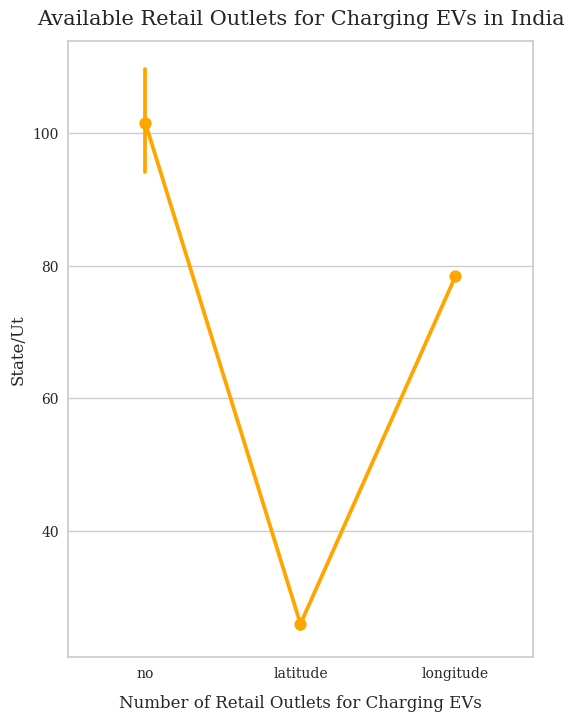

In [ ]:
# retail outlets visualization from dataset - 2
plt.figure(figsize=(6, 8))
sns.pointplot(data=df3, color='orange')
plt.xlabel('Number of Retail Outlets for Charging EVs', family='serif', size=12, labelpad=10)
plt.ylabel('State/Ut', family='serif', size=12)
plt.tick_params(direction='inout')
plt.xticks(family='serif', size=10)
plt.yticks(family='serif', size=10)
plt.title(label='Available Retail Outlets for Charging EVs in India', weight=200, family='serif', size=15, pad=12)
plt.show()

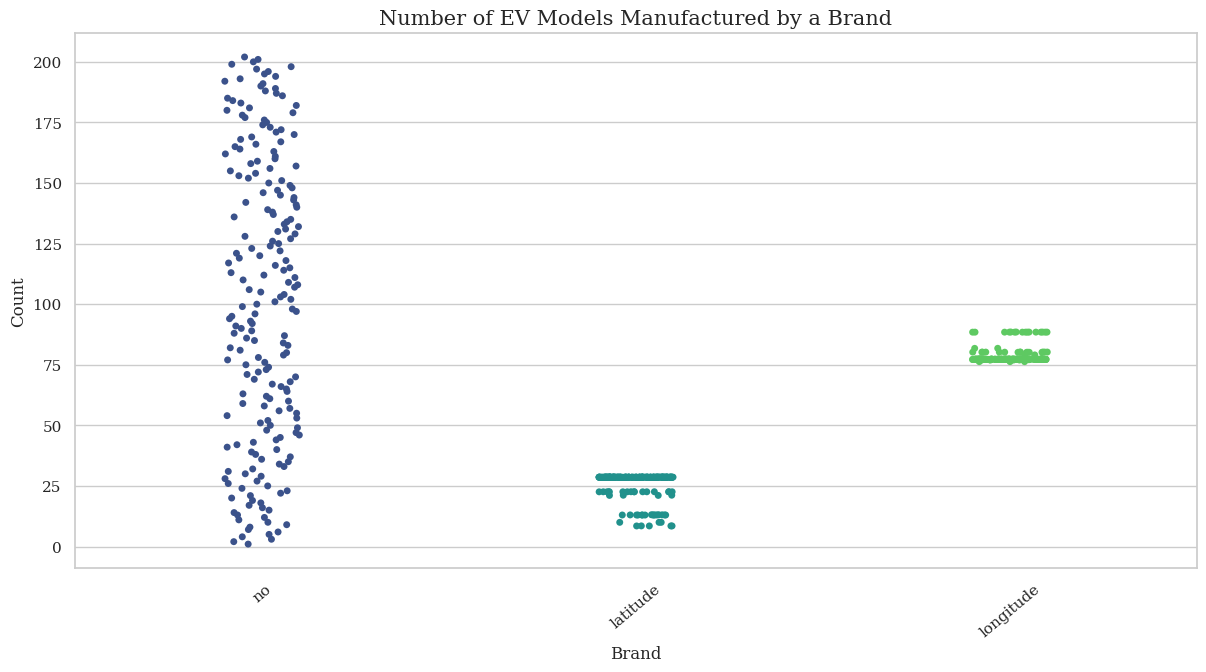

In [ ]:
# brand-wise count of EV models
sns.catplot(data=df3, palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()


# ***Conclusion ***

Based on the above analysis and visualizations, it would be really helpful for any company which is looking to open up an EV startup in India . In this report the analysis of diferent datasets related to EV have been done on  

1] Brands and models of EVs in India with their attributes

2] State wise distribution of 2,3,4 wheeler EV s and passenger cars in India

3] Electric Vehicle Charging Stations In INDIA Analysis.

-The study concludes that understanding the different segments in the Indian EV market is crucial for EV manufactures and marketers to effectively target their customers and promote adoption of EV in India. We have came up with conclusions are as follows related to EV

* UttarPradesh, Gujrat, Haryana are among the top states with the majority of EV 2W vehicles, while the remaining states have less number

* UttarPradesh, Chattisgarh, Haryana are among the top states with the majority of EV 3W vehicles, while the remaining states have less number

* Delhi, Goa, Maharashtra, Kerela and Karnataka are among the only states with EV buses in India .

* Maharashtra, Gujarat, Karnataka, Kerala, Uttar Pradesh, Rajasthan, and Andhra Pradhesh are among the top states with the majority of EV charging stations sanctioned while the remaining states have less number of the same.